### Introduction

My project focuses on the genetic aspect of allergies. Specifically, I am interested in understanding the effect of single-nucleotide polymorphisms (SNPs) on allergic disease. A SNP is a single base pair mutation in an individual's genome. In the field of computational biology and bioinformatics, there are association studies performed, such as genome-wide association studies (GWAS) and exome-wide association studies (EXWAS), which aim to identify SNPs associated with traits of interest. After these studies are completed, the analysis of the associations is a critical step. In some cases, individuals identify cohorts for association studies and then analyze those results independently. However, in the current era of big data, there are repositories that store the results of many association studies, and allow individuals to conduct large scale meta-analyses.

__Research Questions__: How does base pair location impact the degree of SNP association? For example, are SNPs located at the beginning of chromosomes (smaller base pair location) more likely do be associated with allergic disease? Similarly, how do odds ratio, chromosomal location, and the effect allele impact the association level? Can we use some of these characteristics to predict if a SNP will have a strong association? Which of these characteristics are the most important to include when creating models?

I created a few models that was capable of predicting the degree of SNP association based on several features. Some models performed much better than others. The basic Linear and Logistic Regression Models had prediction accuracies lower than 60%, but the Random Forest Model had an average accuracy above 90%. These models can be applied to predict the severity of SNP associations for related allergy phenotypes.

### Data Description

__Motivation__

I obtained the original datasets from the GWAS Catalog. The GWAS Catalog was founded by the National Human Genome Research Institute (NHGRI) in 2008. The catalog was created in response to the significant increase in genome-wide association studies (GWAS) published. It has been challenging to identify published GWAS to fit specific needs since there are so many studies and each study analyzes multiple phenotypes. There were limited resources that combined the results of all these studies. The GWAS Catalog is a large-scale database of associations that allows users to search for GWAS results, and visualize them using several biological criteria.

The GWAS Catalog was developed by the European Bioinformatics Institue at the European Molecular Biology Laboratory (EMBL-EMI) in collaboration with the NHGRI. There was a team of geneticists, molecular biologics, and software developers who created it. The group was led by Helen Parkinson, Fiona Cunningham, Paul Flicek, and Lucia Hindorff.

The GWAS Catalog was funded by the NHGRI Grant Number 2U41HG007823. There was not a specific grant name. The grant was delivered by collaboration between the NHGRI, EMBL-EBI, and the National Center for Biotechnology Information (NCBI).

__Composition__

Each row in the dataset represents one single-nucleotide polymorphism (SNP). A SNP is a mutation in the genome at a specific base pair location. This is the only type of instance in the dataset. In the entire dataset, there are 1543 total instances (SNPs). SNPs can be associated with diseases, and in this dataset all the SNPs are associated with an allergy-related disease. So, this sample is not representative of all SNP associations. This choice was deliberate because I wanted to focus on allergic disease, so I only chose the related phenotypes. The non-allergy SNP associationswere deliberately not included.


Each instance consists of 14 pieces of information (there are 14 columns) that provide information about the SNP association. In order, the columns are BETA, CHR, BP, OR, RAF, PVALUE, VARIANT, EFFECT_ALLELE, TRAIT, MAPPED_GENE_LIST, NUM_MAPPED_GENES, TRAITS_ASSOCIATED_WITH_MAPPED_GENES, BP_DISCRETE, and EFFECT_ALLELE_DISCRETE.

1. BETA: Beta-coefficient associated with the SNP
2. CHR: Chromsome the SNP is located on
3. BP: Base pair location (on the chromosome) of the SNP
4. OR: Odds-ratio associated with the SNP
5. RAF: Risk allele (effect allele) frequency associated with the SNP
6. PVALUE: P-value for the SNP association (with the allergic disease trait)
7. VARIANT: rsID of the SNP
8. EFFECT_ALLELE: effect allele (risk allele) - resulting allele (T, A, G, C) because of the SNP
9. TRAIT: trait (phenotype) the SNP is associated with
10. MAPPED_GENE_LIST: genes located near the SNP
11. NUM_MAPPED_GENES: total number of genes located near the SNP
12. TRAITS_ASSOCIATED_WITH_MAPPED_GENES: traits associated with the genes located near the SNP
13. BP_DISCRETE: discrete transform of the continuous base pair location (continuous # -> 1-4)
14. EFFECT_ALLELE_DISCRETE: discrete transform of the effect allele (T/A/G/C -> 1-4)

There is a label associated with each instance. Every SNP has an rsID that is used for identification and it is a unique string for each SNP. The rsID format is a string starting with 'rs' followed by a sequence of numbers. The character limit is 40 bytes.

There is some information missing from individual instances. For examples, some columns are missing data because it was not collected during the actual study, so it is not in the GWAS Catalog. A few examples of these columns include BETA, RAF, and EFFECT_ALLELE. Additionally, some SNPs are not located near genes (they are located in an intronic region), so there is nothing (empty list) in the MAPPED_GENES column. As a result, there is also nothing in the TRAITS_ASSOCIATED_WITH_MAPPED_GENES column.

The relationships between individual instances can easily (relatively) be determined. Each instance is on its own row. We can see what information instances (SNPs) have in common by comparing the column values. For example, we can analyze the CHR column to group SNPs based on the chromosome they are located on.

There are no recommended data splits. I hope to possibly find some after analyzing the dataset. For example, maybe RAF and EFFECT_ALLELE can be used to predict a SNP's associated trait.

There aren't known errors in the dataset. The software used to add data to the GWAS Catalog is expected to catch errors (ex. chromosome > 23 or invalid effect allele). There are a few redundancies within the dataset. For example, the dataset contains both BETA and OR even though one can be calculated from the other. For this reason, I found it interesting that the BETA column had several missing values while the OR column didn't. Also, some of the additional columns that I added to the dataset (BP_DISCRETE, EFFECT_ALLELE_DISCRETE) will be helpful for analysis but introduced some redundancy since their continuous and string counterparts are still included in the dataset.

This dataset is self-contained. It does not contain any confidential data. None of the data is offensive, insulting, threatening, or anxiety-inducing. The dataset does relate to people. The GWAS Catalog obtained some of its data from studies that sequenced individual's genomes. The dataset does not identify any subpopulations. Additionally, one can't identify individuals based on the dataset unless he or she has access to the individual's sequenced data, and that to wouldn't be enough because many people can have this SNP. The dataset does not contain any sensitive information.

__Collection Process__

The data associated with each instance was obtained from other GWAS. It was verified twice by different qualified members from the NHGRI during a two-step process. Scientists that conducted GWAS submitted their results to the GWAS Catalog. The data underwent an intensive review process and then an automated pipeline was used to extract any extra necessary biological information. This pipeline involved several software procedures (private and open source), including the [Ensembl API](http://rest.ensembl.org/). These methods were either verified previously by other studies or tested by the NHGRI and EMBL-EBI.

This dataset is a sample from the entire GWAS catalog. I only obtained the data related to allergic disease. [Here](https://www.ebi.ac.uk/gwas/search?query=allergic%20disease) is an example of one of the datasets I downloaded and merged with several others. The data in the GWAS Catalog was collected by a team of geneticists, molecular biologics, and software developers. They worked for NHGRI and EMBL-EBI, and were compensated by their employers.

The GWAS Catalog was published in 2008, but is still being updated. The dataset's instances were obtained from studies submitted to the GWAS Catalog, which may not have occurred in the exact same year as they were published in the Catalog. For example, a study may have occurred in 2010 and added to the catalog in 2012. This slight delay is often due to the time needed to verify the results of the submitted study.

There were no ethical review processes since the GWAS Catalog didn't obtain the human data itself. It obtained the data from the studies, which must have needed some review process, but that depends on the specific study.

The dataset does specifically relate to people. The catalog collects its data from GWAS, which used human genetic data. But the GWAS Catalog is not involved with the human participant process and just obtains the GWAS results. These results don't contain human-identifiable information.

__Preprocessing/Cleaning/Labeling__

Before adding data to the GWAS Catalog, a team of curators manually verifies that the data is accurate. The team examines the study that reported the data to check the accuracy and consistency of the findings. Some of the software used is noted [here](https://www.ebi.ac.uk/gwas/docs/pilots), but not all of it is open-source. After obtaining the data from a study, an automated pipeline adds more biological information before it is published to the GWAS Catalog. The pipeline identifies additional known biological information (such as the gene's base pair location) using the [Ensembl API](http://rest.ensembl.org/). However, the automated pipeline itself is not open-source.

__Uses__

I do not believe that my exact dataset has been used for other tasks. That would require an individual to follow the exact same steps that I did (merge the same datasets, scrape using the same endpoints, and perform the same preprocessing steps). However, others have definitely analyzed some of the same associations (rows) that my dataset has. There is not a specific task that they would have used the data for. Some tasks include performing a meta-analysis of GWAS, identifying similar SNPs and genes associated with different traits, and aggregating GWAS results into trait-specific/class-specific data repositories. There is not a repository that links to all papers that use the GWAS Catalog. However, all studies are requested to cite the catalog in the following way: "Summary statistics were downloaded from the NHGRI-EBI GWAS Catalog on XX/XX/XXXX".

There are several scientists and research groups that submitted their studies to the GWAS Catalog. The privacy policy is included on the [GWAS Catalog Website](https://www.ebi.ac.uk/gwas/docs/about). This doesn't directly affect future users, but they should read about the policy if it is something they are concerned about. Future users should also be careful if they are restricting analysis to a specific time period. The GWAS Catalog announces updates and new releases on its website, but does not remove data from several years ago. So if future users only want to analyze data since 2015, as an example, they should carefully parse the data to only use entries within that time range. The data states the study it was extracted from, so users can easilly subset based on a date.

There are not any specific taks for which the GWAS Catalog should not be used. There are just tasks for which it can be used to reduce the amount of web scraping and preprocessing required.

### Preregistration Statement

__Analysis 1:__ I will create a logistic regression model that predicts the binarized SNP association level (significant or not significant) based on the discrete base pair location.

__Analysis 2:__ I will create a linear regression model that predicts the discrete SNP association value (not significant, suggested significance, genome-wide significance) based on the continous odds ratio, discrete chromosomal location, discrete base pair location, and the discrete effect allele.

I chose to incorporate these features because they were correlated and previous literature suggests that they might impact the SNP association values for allergic disease since they have impacted them for other traits.

I will generate these models for the top three phenotypes in the dataset. If these models have a high accuracy, then it will be beneficial since there have been a few models that have incorporated allergic disease phenotype data in the past. This model can then be used as a building block for modeling data from related allergy phenotypes. If the results are not significant, then I will identify potential reasons why, such as if certain features should not have been included. I will further analyze the features in unsuccessful models in an individual capacity. An unsuccessful result would still be interesting because it would highlight the differences in allergy models with models for other diseases since some of these features have successfuly be used to model other diseases.

### Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score

In [2]:
final_dataset = pd.read_csv("final_dataset.csv")

all_few_missing = final_dataset[(final_dataset["BP"] != -10) & (final_dataset["OR"] != -10)]

#### Logistic Regression

First, I created a Logistic Regression Model to predict SNP association level based on discrete base pair location. I create discrete SNP association levels based on the p-value of each SNP. In an individual, there is a threshold used to separate genome-wide significant associations with non-genome-wide significant associations. SNPs with p-values less than the threshold are classified as genome-wide significant, while SNPs with p-values greater than the threshold are not. However, there is not a single threshold used for all studies. It varies depending on the total number of SNPs and the number of traits analyzed in the study. One common method for calculating the threshold is: threshold $= \frac{\text{standard threshold}}{\text{# SNPS analyzed } * \text{ # traits}}$. I slightly modified this formula since I analyzed the results of multiple studies: threshold $= \frac{\text{standard threshold}}{\text{# allergy SNPs in GWAS Catalog } * \text{ # allergy studies}}$. This resulted in the threshold $= \frac{5 * 10^{-8}}{830 * 30} = 2.0080 * 10^{-12}$ since $5 * 10^{-8}$ is the standard genome-wide significant threshold.

I had to perform some preprocessing prior to creating the model. The initial dataset stored the p-values as continuous values, so I created a new column for this value. It was 1 if the p-value was genome-wide significant (less than the threshold) and 0 if it was not (greater than the threshold).

In [3]:
threshold_genwidesig = (5e-8) / (830 * 38)

subset_df_log = all_few_missing[["PVALUE", "BP_DISCRETE"]].copy()
subset_df_log["PVALUE_DISCRETE_2LEVELS"] = [1 if val < threshold_genwidesig else 0 for val in all_few_missing.copy()["PVALUE"]]

subset_df_log.head()

,PVALUE,BP_DISCRETE,PVALUE_DISCRETE_2LEVELS
0,1.000000e-08,3,0
1,1.000000e-08,3,0
2,1.000000e-06,3,0
3,2.000000e-06,1,0
4,2.000000e-06,1,0


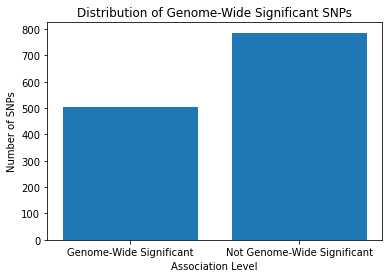

In [4]:
# Reached genome-wide significance
num_gen_wide = (subset_df_log["PVALUE"] < threshold_genwidesig).sum()

# Not reached genome-wide significance
num_not_gen_wide = (subset_df_log["PVALUE"] > threshold_genwidesig).sum()

plt.bar(["Genome-Wide Significant", "Not Genome-Wide Significant"], [num_gen_wide, num_not_gen_wide])
plt.xlabel("Association Level")
plt.ylabel("Number of SNPs")
plt.title("Distribution of Genome-Wide Significant SNPs")
plt.show()

Next, I split the dataset into training and testing sets. I used a testing size of 30% in order to adequately evaluate the model's performance. I fit the Logistic Regression model on the training data, and then evaluated the model. The model performed slightly better than average with an accuracy of 58% with this 30% testing set size. The regression coefficient is negative indicated that increasing the base pair (moving to a farther location on the chromosome) decreases the chance of the SNP reaching genome-wide significance, but the coefficient is very close to 0 so this relationship is very weak.

In [5]:
x_train, x_test, y_train, y_test = train_test_split(subset_df_log[["BP_DISCRETE"]], 
                                                    subset_df_log["PVALUE_DISCRETE_2LEVELS"], 
                                                    test_size = 0.30, random_state = 10)

model_logit = LogisticRegression(random_state = 10).fit(x_train, y_train)
print("Logistic Regression Coefficient:", round(model_logit.coef_[0][0], 4))

predictions = model_logit.predict(x_test)
print("Model Prediction Accuracy:", round(sum(predictions == y_test) * 100 / len(predictions), 4))

Logistic Regression Coefficient: -0.0708
Model Prediction Accuracy: 57.9897


I investigated potential reasons for the 58% accuracy, and one clear limitation of this model is that it always predicted 0. I plotted the model predictions over the range -100 to 100. The model was only trained with inputs ranging from 1 to 4, so I'm not really interested in the predicition values outside this range. Ideally, the prediction transition from 0 to 1 would happen within the 1 to 4 range. Since it doesn't, the model always predicts 0 or 1 (0 in this case), and thus only predicts about half correctly.

(array([1, 2, 3, 4]), array([271, 131, 302, 199]))
(array([0, 1]), array([561, 342]))
(array([1, 2, 3, 4]), array([120,  52, 124,  92]))
(array([0, 1]), array([225, 163]))
(array([0]), array([388]))


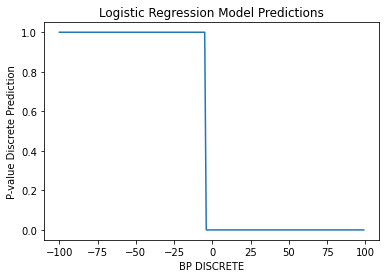

In [6]:
for group in [x_train, y_train, x_test, y_test, predictions]:
    print(np.unique(group, return_counts=True))
    
# BP_DISCRETE is only 1 - 4, but this model always predicts 0
x = [ [i] for i in range(-100, 100)]
y = model_logit.predict(x)

plt.plot(x, y)
plt.xlabel("BP DISCRETE")
plt.ylabel("P-value Discrete Prediction")
plt.title("Logistic Regression Model Predictions")
plt.show()

I tried modifying the train/test split sizes to see if this could possibly improve the model. I aimed to create a model that transitioned within the 1 to 4 range. Otherwise, the model would be fairly trivial as it only predicts one value for the range I'm interested in. I created models that ranged in test sizes from 0.1 to 0.5, and all models still only predicted 0. The maximum accuracy was only 60%, which was expected since the model will never predict genome-wide significant (1) for the inputs I'm interested in (1-4).

This suggests that a Logistic Regression Model may not be the best model for this purpose. The main reason is that there doesn't seem to be a clear distinction in inputs that leads to a different output. For example, if the inputs 1 and 2 were more likely to be genome-wide significant (output 1), and the other inputs 3 and 4 were more likely to not to be significant (output 0), then a Logistic Regression Model would most likely work really well. However, that does not seem to be the case which suggests that we can't broadly generalize location of a SNP on a chromosome into two classes and then determine if it's significant based on the class it's in. We most likely need to structure the classes differently as opposed to just having a threshold where values above are significant and values below are not significant. For example, one possiblility is that SNPs at the beginning and ends of chromosomes (inputs 1 and 4) are significant, which SNPs near the middle of chromosomes (inputs 2 and 3) are not significant. This would require more complicated models that can represent two transitions between 0 and 1, since logit can only represent one.

In [7]:
for i in range(10, 55, 5):
    
    test_size = i/100
    train_size = 1 - test_size

    x_train, x_test, y_train, y_test = train_test_split(subset_df_log[["BP_DISCRETE"]], 
                                                        subset_df_log["PVALUE_DISCRETE_2LEVELS"], 
                                                        test_size = test_size, random_state = 10)

    print("Train Size:", train_size)
    print("Test Size:", test_size)

    model_logit = LogisticRegression(random_state = 10).fit(x_train, y_train)
    print("Logistic Regression Coefficient:", round(model_logit.coef_[0][0], 4))

    predictions = model_logit.predict(x_test)
    print("Model Prediction Accuracy:", round(sum(predictions == y_test) * 100 / len(predictions), 4))
    print(np.unique(predictions, return_counts=True))
    
    print()

Train Size: 0.9
Test Size: 0.1
Logistic Regression Coefficient: -0.0742
Model Prediction Accuracy: 54.6154
(array([0]), array([130]))

Train Size: 0.85
Test Size: 0.15
Logistic Regression Coefficient: -0.0796
Model Prediction Accuracy: 59.2784
(array([0]), array([194]))

Train Size: 0.8
Test Size: 0.2
Logistic Regression Coefficient: -0.074
Model Prediction Accuracy: 57.529
(array([0]), array([259]))

Train Size: 0.75
Test Size: 0.25
Logistic Regression Coefficient: -0.0835
Model Prediction Accuracy: 57.2755
(array([0]), array([323]))

Train Size: 0.7
Test Size: 0.3
Logistic Regression Coefficient: -0.0708
Model Prediction Accuracy: 57.9897
(array([0]), array([388]))

Train Size: 0.65
Test Size: 0.35
Logistic Regression Coefficient: -0.0862
Model Prediction Accuracy: 59.0708
(array([0]), array([452]))

Train Size: 0.6
Test Size: 0.4
Logistic Regression Coefficient: -0.0921
Model Prediction Accuracy: 59.1876
(array([0]), array([517]))

Train Size: 0.55
Test Size: 0.45
Logistic Regressio

#### Linear Regression

The next model I created was a Linear Regression Model to predict SNP association level based on odds ratio (OR), chromosomal location, discrete base pair location, and the discrete effect allele. Since I was not limited to binary output, I expanded the number of possible SNP association levels from two to three. In addition to reaching genome-wide significance, SNPs can also reach suggestive association. If SNPs don't reach the suggestive association, then they are considered not significant.

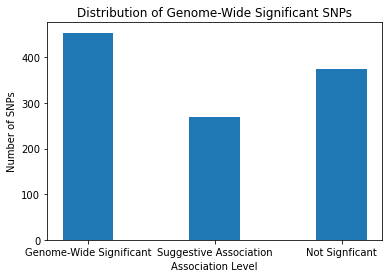

In [8]:
subset_df_lin = all_few_missing[["PVALUE", "OR", "CHR", "BP_DISCRETE", "EFFECT_ALLELE_DISCRETE"]].copy()

# Remove missing values which was represented with -10 (other columns don't have any) before model generation
# They were left in during the cleaning process because I didn't want to remove ALL entries with missing values,
# and instead chose to remove the rows during smaller analysis (reduces this dataframe from 1291 rows to 1098 rows)

subset_df_lin = subset_df_lin[subset_df_lin["EFFECT_ALLELE_DISCRETE"] != -10]
threshold_suggassoc = (5e-5) / (830 * 38)

subset_df_lin["PVALUE_DISCRETE_3LEVELS"] = [2 if val < threshold_genwidesig else (1 if val < threshold_suggassoc else 0) for val in subset_df_lin["PVALUE"]]

# Reached genome-wide significance
num_gen_wide = (subset_df_lin["PVALUE_DISCRETE_3LEVELS"] == 2).sum()

# Reached suggestive association
num_sugg_assoc = (subset_df_lin["PVALUE_DISCRETE_3LEVELS"] == 1).sum()

# Not significant
num_not_sig = (subset_df_lin["PVALUE_DISCRETE_3LEVELS"] == 0).sum()

plt.bar(["Genome-Wide Significant", "Suggestive Association", "Not Signficant"], 
        [num_gen_wide, num_sugg_assoc, num_not_sig], width = 0.4, align = "center")
plt.xlabel("Association Level")
plt.ylabel("Number of SNPs")
plt.title("Distribution of Genome-Wide Significant SNPs")
plt.show()

I created the model by first splitting the data into training and testing sets (test size = 30%). The model was terrible as it had an accuracy of 0%. The main reason for this is that Linear Regression Models are not well suited to predict discrete values. I chose not to keep the p-value continuous because those values are very specific and nuanced, which would lead to a lower accuracy. Additionally, I am not interested in predicting the actual p-value, but whether the SNP reaches a specific threshold.

One alternative is to create a hybrid model by using a Linear Regression model to predict a continuous p-value and then threshold the result into one of the three association levels.

In [9]:
x_train, x_test, y_train, y_test = train_test_split(subset_df_lin[["OR", "CHR", "BP_DISCRETE", 
                                                                   "EFFECT_ALLELE_DISCRETE"]], 
                                                    subset_df_lin["PVALUE_DISCRETE_3LEVELS"], 
                                                    test_size = 0.30, random_state = 10)

model_lin = LinearRegression().fit(x_train, y_train)
print("Model Regression Coefficient:", round(model_lin.coef_[0], 4))

predictions = model_lin.predict(x_test)
print("Model Prediction Accuracy:", round(sum(predictions == y_test) * 100 / len(predictions), 5))

print(model_lin.coef_)

# Linear model not great for discrete values

#print(predictions) -- predictions are very close to 0, 1, 2, but not exactly -- thus they are incorrect
#for val in y_test:
#    print(val)

Model Regression Coefficient: -0.2823
Model Prediction Accuracy: 0.0
[-0.28226152 -0.02035349 -0.022755   -0.02369435]


In [10]:
# Adapt model to predict the continuous Pvalue
x_train, x_test, y_train, y_test = train_test_split(subset_df_lin[["OR", "CHR", "BP_DISCRETE", 
                                                                   "EFFECT_ALLELE_DISCRETE"]], 
                                                    subset_df_lin["PVALUE"], 
                                                    test_size = 0.20, random_state = 10)

model_lin_cont = LinearRegression().fit(x_train, y_train)
print("Model Regression Coefficient:", round(model_lin_cont.coef_[0], 4))

predictions = model_lin_cont.predict(x_test)
print("Model Prediction Accuracy:", round(sum(predictions == y_test) * 100 / len(predictions), 4))

Model Regression Coefficient: 0.0
Model Prediction Accuracy: 0.0


In [11]:
# The Pvalues are very specific so it will be extremely difficult to predict them exactly
# That was my reasoning for converting the continuous values to discrete values
model_lin_cont.coef_

array([ 6.36874563e-07,  7.48406549e-09, -2.12044697e-08,  1.18887449e-08])

#### Additional Models

A more complicated model might better predict the 3-level discrete p-value. The 2-level logistic model works ok, but its accuracy is only 58%, and ideally I want to be able to distinguish between genome-wide significant, suggestive association, and not significant, as opposed to just genome-wide significant and not genome-wide significant.

I looked into the following models: Naive Bayes, Support Vector Machine (SVM), k-Nearest Neighbors, Decision Tree, and Random Forest. I ruled out Naive Bayes since it assumes the features (columns) are independent, which is not valid since some are correlated. I chose not to use SVMs because of the dimensional size of the feature space. SVMs aim to identify a geometric boundary to separate different groups of features. If the feature space is 2D (only two features), then the SVM can utilize something as simple as a line to separate the features (ex. all features above the line are classified as X and all features below the line are classified as Y). However, in a larger dimension feature space, the geometric boundary can become much more complicated, such as a Gaussian, and this often leads to overfitting (the model will become too specific based on the training set and not be able to perform well on data it hasn't seen before).

In [12]:
# Same as used for linear model
x_train, x_test, y_train, y_test = train_test_split(subset_df_lin[["OR", "CHR", "BP_DISCRETE", 
                                                                   "EFFECT_ALLELE_DISCRETE"]], 
                                                    subset_df_lin["PVALUE_DISCRETE_3LEVELS"], 
                                                    test_size = 0.30, random_state = 10)

model_rf = RandomForestClassifier(random_state = 10)
model_rf.fit(x_train, y_train)

print("Random Forest (no standardization) Score:", model_rf.score(x_test, y_test))

# Standardize data

scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

model_rf_st = RandomForestClassifier(random_state = 10)
model_rf_st.fit(x_train, y_train)

# Doesn't have an impact here
print("Random Forest (wite standardization) Score:", model_rf_st.score(x_test, y_test))

Random Forest (no standardization) Score: 0.7878787878787878
Random Forest (wite standardization) Score: 0.7818181818181819


The accuracy of this model was much better than the previous models. Even though there were only four features in this model, I wanted to identify if all of these features were needed to maintain a relatively high accuracy. I performed Principal Component Analysis (PCA) to reduce the number of features and account for a large amount of variance within the dataset. I started by trying to account for 95% of variance, and this required 4 PCA components and didn't impact the accuracy.

In [13]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

pca95 = PCA(0.95)
pca95.fit(x_train)

print("Number of Components:", pca95.n_components_)

x_train = pca95.transform(x_train)
x_test = pca95.transform(x_test)

model_rf_pca = RandomForestClassifier(random_state = 10)
model_rf_pca.fit(x_train, y_train)

print("Score:", model_rf_pca.score(x_test, y_test))

Number of Components: 4
Score: 0.7878787878787878


I created a function to perform PCA given the amount of variance to account for, and then used this to perform PCA several times to account for 50-95% of variance within the dataset.

In [14]:
def performPCA(var):
    pca_var = PCA(var)
    pca_var.fit(x_train)
    
    train = pca_var.transform(x_train)
    test = pca_var.transform(x_test)
    
    model_var = RandomForestClassifier(random_state = 10)
    model_var.fit(train, y_train)
    
    return [pca_var.n_components_, model_var.score(test, y_test)]

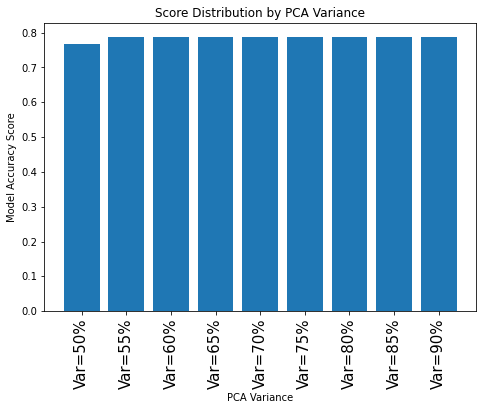

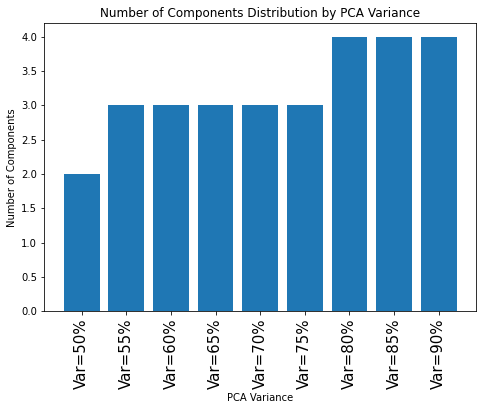

In [15]:
labels = []
num_comp = []
scores = []

for i in range(50, 95, 5):
    num_c, score = performPCA(i/100)
    
    labels.append(i)
    num_comp.append(num_c)
    scores.append(score)

#print(labels)
#print(num_comp)
#print(scores)

labels = ["Var=" + str(i) + "%" for i in labels]

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(labels, scores)
plt.title("Score Distribution by PCA Variance")
plt.xlabel("PCA Variance")
plt.ylabel("Model Accuracy Score")
plt.tick_params(axis = "x", rotation = 90, labelsize = 15)
plt.show()

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(labels, num_comp)
plt.title("Number of Components Distribution by PCA Variance")
plt.xlabel("PCA Variance")
plt.ylabel("Number of Components")
plt.tick_params(axis = "x", rotation = 90, labelsize = 15)
plt.show()

Based on the PCA results, it doesn't seem like reducing the number of features has a major effect on the accuracy of the model. To account for 50-75% of the variance, we don't need all 4 features (only 2-3), which is due to the correlation among some of the features.

Another evaluation tool I used was k-Fold Cross Validation. This split the dataset into k different groups, performed a test/train split on that group, and then evaluated the result. This can provide more insights into the model since it simulates having a bunch of smaller datasets, so we can identify if the model is overfitting or underfitting. On average, the model performed better. One possible is reason is that the smaller groups don't have all discrete levels, allowing the model to be much simpler and more accurate. Specifically, one group might only have the output 1, and the model will essentially be a linear model that always predicts 1, leading to an accuracy of 100%.

In [16]:
features = subset_df_lin[["OR", "CHR", "BP_DISCRETE", "EFFECT_ALLELE_DISCRETE"]]
predict = subset_df_lin["PVALUE_DISCRETE_3LEVELS"]

scores = cross_val_score(model_rf, features, predict, cv = 10)
for i in range(len(scores)):
    print("Score", str(i + 1) + ":", scores[i])

print("Average Score:", sum(scores)/len(scores))

Score 1: 1.0
Score 2: 1.0
Score 3: 1.0
Score 4: 0.990909090909091
Score 5: 0.990909090909091
Score 6: 0.9818181818181818
Score 7: 0.8090909090909091
Score 8: 0.8909090909090909
Score 9: 0.6880733944954128
Score 10: 0.7064220183486238
Average Score: 0.9058131776480401


### Limitations

There are some limitations of this dataset.

First, the dataset has a limited number of traits. There are comparatively few allergic disease related traits in the GWAS Catalog compared to other sources. I scraped all the allergy traits and that resulted in ~1500 SNPs. If the Catalog had more allergy traits then I could incorporate many more SNPs into my analysis. 

Similarly, there are some overlapping traits. For example, 'Eczema, allergic rhinitis' is one trait and 'Eczema, allergic rhinitis, asthma' is a different trait. There are two main problems with this. First, eczema, allergic rhinitis, asthma should all be their own traits. Second, what is the difference between these two traits? There is a decent amount of overlap among these traits and the only fundamental difference is the GWAS that identified the association. This will result in different p-values, and possibly different beta coefficients and odds ratios, for the same variant (SNP). However, the biological features of the SNP (chromosome, base pair location, etc.) will all be the same. This will be a major source of confounding. On top of this, there is another trait labeled 'atopic eczema'. I haven't finalized how I will handle this situation, but I'm thinking about focusing on comparing the single traits (ex: 'atopic eczema', 'allergic rhinitis'), and placing less emphasis on the combined traits (ex: 'eczema, allergic rhinitis').

Next, there is a decent amount of missing data in some columns. The beta coefficient column is one example, which is interesting because the odds ratio column doesn't have this same problem and the beta coefficient can be calculated from the odds ratio. This makes me doubt the validity of the odds ratio values, but it just may have been that the automated pipeline didn't calculate the beta-coefficient if it was missing, even though it should have. Additionally, not a lot of SNPs have a list of nearby genes. This is surprising from a biological aspect since we expect SNPs to be located near genes if they impact the predisposition of a trait. This might be a limitation of the software used to extract the relevant biological information.

Another limitation is the imbalance of SNP associations per trait. Ideally, all traits would have the same number of associations, or at least similar counts (in this dataset some traits have ~300 SNPs and some have ~5 SNPs). Since that is not the case, potential classification models may exhibit overfitting or underfitting based on the data available. Additionally, it will pose a challenge to generate one cohesive model for multiple traits because of the sample size discrepancy.

One more limitation is that fact that I don't have access to other details from the GWAS that identified a SNP. Specifically, I don't have access to the number of traits or number of SNPs analyzed in the study. If I had access to this data, I could use it to identify if the p-value of the SNP association reached genome-wide significance (essentially, genome-wide significance increases the likelihood of the SNP actually impacting a biological phenomena - in this case that would be the predisposition of an allergy phenotype). This would have allowed me to generate another discrete column (1 if the SNP reached genome-wide significance, 0 if the SNP didn't). I could have used this column as another feature in a classification model.

Lastly, despite the software verification that the GWAS Catalog performed, there could be errors with the reported associations. Some of the related biological data (chromosome, effect allele, etc.) could have been collected incorrectly and that would skew the results. This doesn't seem to be a major problem since the GWAS Catalog has been used for several years, and if there was a major problem another user most likely would have already reported it.

### Questions for Reviewers

1. Is it necessary to have separate sections for data analysis, evaluation of significance, and interpretation/conclusions? Currently, I explain one analysis, perform it, evaluate and interpret the results, and then move onto the next analysis. I believe that this flows better than isolating analyses, evaluations, and interpretations in separate sections.
2. Is the data analysis section too long? I wanted to show how the model evolved as I improved its accuracy as well as how I evaluated each model. I debated removing some of the middle model iterations, but then the reader might get confused how I went from the first to the last model.